In [1]:

import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm
from scipy import constants 
import os
import json

# Generalized variables
textwidth_cm = 15  # Text width in cm
aspect_ratio = 0.618     # Aspect ratio (height/width) using the golden ratio

# Font sizes
label_fontsize = 12
legend_fontsize = 12
tick_fontsize = 10
colorbar_label_fontsize = 12
colorbar_tick_fontsize = 10
offset_text_fontsize = 12
tick_fontsize = 10
errorbar_capsize = 5

# Convert text width from cm to inches
textwidth_in = textwidth_cm / 2.54

# Calculate figure size based on text width and aspect ratio
fig_width = textwidth_in
fig_height = textwidth_in * aspect_ratio

save_dir = '/home/pkruyt/cernbox/figures_thesis_pdf/imperfections_magnetic_field/'

In [2]:
with open('leir.json', 'r') as f:
    line_LEIR = xt.Line.from_dict(json.load(f))  
twiss=line_LEIR.twiss(method='4d')

Xcoll not installed


Loading line from dict:   0%|          | 0/2526 [00:00<?, ?it/s]

Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [3]:
particle_ref=line_LEIR.particle_ref

twiss.qx

np.float64(1.8437337892474654)

In [4]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


# beta_rel = 0.305
beta0 = particle_ref.beta0
# gamma = 1.050
gamma0 = particle_ref.gamma0
mass0=particle_ref.mass0 #ev/c^2
q0=particle_ref.q0
p0c = mass0*beta0*gamma0 #eV/c

current = 0.229  # A current
cooler_length = 2.5 # m cooler length
radius_e_beam = 25*1e-3 #m radius of the electron beam
temp_perp = 100e-3 # <E> [eV] = kb*T
temp_long =  1e-3 # <E> [eV]
magnetic_field = 0.075 # 700 Gauss in LEIR


c = constants.c   

circumference = twiss.circumference #m
T_per_turn = circumference/(c*beta0)
ms_per_turn = 1000*T_per_turn


beta_x=10 
beta_y=4
emittance=10*1e-6
qx=twiss.qx
qy=twiss.qy
dqx= twiss.dqx      #-0.0005113579791
dqy= twiss.dqy      #-0.0001665178543
dx=0

arc = xt.LineSegmentMap(
        qx=qx, qy=qy,
        dqx=dqx, dqy=dqy,
        length=circumference,
        betx=beta_x,
        bety=beta_y,
        dx=0)

num_particles=int(1e4)

particles = xp.Particles(        
        mass0=mass0,
        p0c=p0c,
        x=np.random.normal(0,1e-40 ,num_particles),
        px=np.random.normal(0, np.sqrt(emittance/beta_x), num_particles),
        y=np.random.normal(0, 1e-40, num_particles),
        py=np.random.normal(0, 1e-40, num_particles),
        delta=np.random.normal(0, 1e-40, num_particles),
        zeta=np.random.normal(0, 1e-40, num_particles)
        )

particles00=particles.copy()
particles1=particles.copy()


cant slice electron cooler too thin. Need to consider the values of tau and elec_plasma_frequency. Too many small electron coolers and then the impact parameters will change because time of flight becomes smaller than 1/elec_plasma_frequency.

In [5]:
from scipy.constants import elementary_charge as QELEM, electron_mass as MASS_ELECTRON, epsilon_0 as EPSILON_0

length=cooler_length/100
volume_e_beam = np.pi * (radius_e_beam**2) * length
num_e_per_s = current / QELEM
tau = length / (beta0*c*gamma0)
electron_density = num_e_per_s * tau / volume_e_beam

elec_plasma_frequency =np.sqrt(electron_density * (QELEM)**2 / (MASS_ELECTRON * EPSILON_0))

print('elec_plasma_frequency',1/elec_plasma_frequency)
print('tau',tau)



elec_plasma_frequency [3.50744208e-09]
tau [8.77163864e-10]


In [6]:
v_perp_temp = np.sqrt(QELEM*temp_perp/MASS_ELECTRON);   
rho_larmor = MASS_ELECTRON*v_perp_temp/QELEM/magnetic_field
print('rho_larmor',rho_larmor)

rho_larmor 1.0053748984603986e-05


In [7]:
from scipy.constants import elementary_charge as QELEM, electron_mass as MASS_ELECTRON, epsilon_0 as EPSILON_0, c

# Solve for L when tau = tau_threshold
L_threshold = ((np.pi * radius_e_beam**2 * MASS_ELECTRON * EPSILON_0) / (current * QELEM))**(1/3) * (beta0 * c * gamma0)

# Print result
L_threshold


LinkedArrayCpu([0.2153938])

  0%|          | 0/4 [00:00<?, ?it/s]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


/tmp/pkruyt/ipykernel_68611/43335250.py:102: RuntimeWarning: Mean of empty slice.
  force=force_temp.mean(axis=0)
/home/pkruyt/miniforge3/envs/xsuite_coolers/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


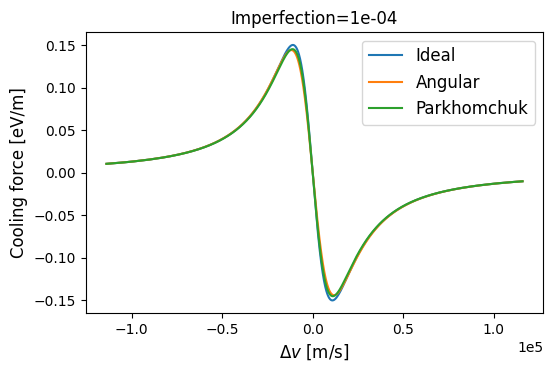

 25%|██▌       | 1/4 [00:23<01:09, 23.24s/it]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


/tmp/pkruyt/ipykernel_68611/43335250.py:102: RuntimeWarning: Mean of empty slice.
  force=force_temp.mean(axis=0)
/home/pkruyt/miniforge3/envs/xsuite_coolers/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


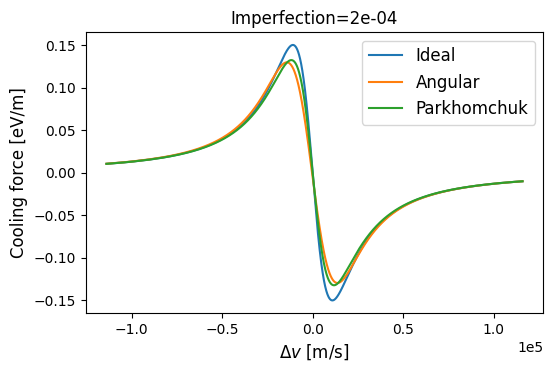

 50%|█████     | 2/4 [00:46<00:46, 23.42s/it]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


/tmp/pkruyt/ipykernel_68611/43335250.py:102: RuntimeWarning: Mean of empty slice.
  force=force_temp.mean(axis=0)
/home/pkruyt/miniforge3/envs/xsuite_coolers/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


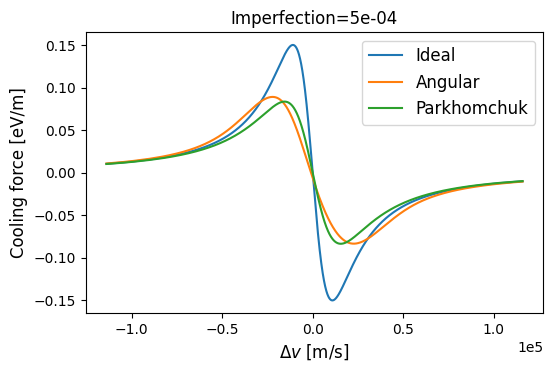

 75%|███████▌  | 3/4 [01:11<00:23, 23.87s/it]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


/tmp/pkruyt/ipykernel_68611/43335250.py:102: RuntimeWarning: Mean of empty slice.
  force=force_temp.mean(axis=0)
/home/pkruyt/miniforge3/envs/xsuite_coolers/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


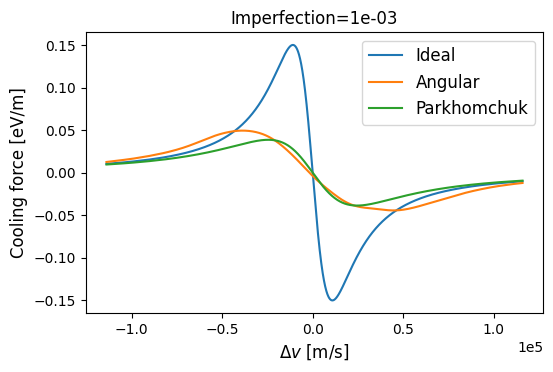

100%|██████████| 4/4 [01:35<00:00, 23.95s/it]


In [8]:
#xp_cooler=1e-3

magnetic_field_ratio=1e-3

magnetic_field_ratio_list = [1e-4, 2e-4, 5e-4, 1e-3]
#Iterate over different values of the magnetic field quality to see effect on cooling performance.

for magnetic_field_ratio in tqdm(magnetic_field_ratio_list):

    cooler = xt.ElectronCooler(current=current, length=cooler_length, radius_e_beam=radius_e_beam,
                                            temp_perp=temp_perp, temp_long=temp_long,
                                            magnetic_field=magnetic_field,magnetic_field_ratio=magnetic_field_ratio,
                                            space_charge_factor=0,
                                            offset_px=0,
                                            record_flag=1)

    line = xt.Line(elements=[cooler])
    #line.particle_ref = particle_ref
    line.build_tracker()

    # Start internal logging for the electron cooler
    record = line.start_internal_logging_for_elements_of_type(
        xt.ElectronCooler, capacity=10000)


    cooler0 = xt.ElectronCooler(current=current, length=cooler_length, radius_e_beam=radius_e_beam,
                                            temp_perp=temp_perp, temp_long=temp_long,
                                            magnetic_field=magnetic_field,magnetic_field_ratio=0,
                                            space_charge_factor=0,
                                            offset_px=0,
                                            record_flag=1)

    line0 = xt.Line(elements=[cooler0])
    #line.particle_ref = particle_ref
    line0.build_tracker()

    # Start internal logging for the electron cooler
    record0 = line0.start_internal_logging_for_elements_of_type(
        xt.ElectronCooler, capacity=10000)


    line_series=xt.Line()

    num_coolers=int(1e3)

    for i in range(num_coolers):
        angle=np.random.normal(0,magnetic_field_ratio,1)
        #angle=np.random.uniform(-B_ratio,B_ratio,1)
        #print('angle:',angle)
        cooler_tiny = xt.ElectronCooler(current=current, length=cooler_length, radius_e_beam=radius_e_beam,
                                            temp_perp=temp_perp, temp_long=temp_long,
                                            magnetic_field=magnetic_field,magnetic_field_ratio=0,
                                            space_charge_factor=0,
                                            offset_px=angle,
                                            record_flag=1)
        
        
        #coolers.append(cooler_tiny)
        line_series.append_element(name=f'cooler{i}',element=cooler_tiny)

    line_series.build_tracker()

    record_series = line_series.start_internal_logging_for_elements_of_type(
        xt.ElectronCooler, capacity=num_particles*num_coolers)

    num_turns=int(1)

    x=[]
    px=[]
    action = []
    force = []
    force_old = []
    force_0 = []


    for i in (range(num_turns)):
        x.append(particles.x)
        px.append(particles.px)
        
        action_temp = (particles.x**2/beta_x + beta_x*particles.px**2) #Joule sec
        action.append(action_temp)    
    
        force_temp=[]        
        
        particles0=particles00.copy()
        line.track(particles0)
        force = record.Fx
        force_old.append(force)    
        
        particles0=particles00.copy()
        line0.track(particles0)
        force_x0 = record0.Fx
        force_0.append(force_x0)

        particles1=particles00.copy()
        line_series.track(particles1)
        fx=record_series.Fx
        fx = fx.reshape(num_coolers, -1)
            
            
        force_temp=np.array(force_temp)
        force=force_temp.mean(axis=0)  
        force=fx.mean(axis=0)
        #force=np.squeeze(force)

    x = np.array(x)
    px = np.array(px)
    action = np.array(action)
    force = np.array(force).flatten().flatten()
    force_old = np.array(force_old).flatten().flatten()
    force_0 = np.array(force_0).flatten().flatten()


    px_tot = p0c * px
    beta_diff = px_tot / (mass0 * gamma0)
    v_diff = beta_diff * c

    v_diff=v_diff.flatten().flatten()

    sorted_indices = np.argsort(v_diff)
    v_diff_sorted = v_diff[sorted_indices]
    force_0_sorted = force_0[sorted_indices]
    force_sorted = force[sorted_indices]
    force_old_sorted = force_old[sorted_indices]

    Fx_series_sorted= force[sorted_indices]


    # Create the figure with the calculated dimensions
    plt.figure(figsize=(fig_width, fig_height))

    # Plot the data
    plt.plot(v_diff_sorted, force_0_sorted, label='Ideal')
    plt.plot(v_diff_sorted, force_sorted, label='Angular')
    plt.plot(v_diff_sorted, force_old_sorted, label='Parkhomchuk')

    # Set labels with appropriate font size
    plt.title(f'Imperfection={magnetic_field_ratio:.0e}', fontsize=label_fontsize)
    plt.xlabel('$\\Delta v$ [m/s]', fontsize=label_fontsize)
    plt.ylabel('Cooling force [eV/m]', fontsize=label_fontsize)

    # Set tick label size
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

    # Add legend with defined font size
    plt.legend(fontsize=legend_fontsize)

    # Use scientific notation for the x-axis
    plt.ticklabel_format(axis='x', style='sci', scilimits=(-2, 2))


    image_name = f'leir_imperfections={magnetic_field_ratio:.0e}.pdf'
    save_location = os.path.join(save_dir, image_name)

    import pickle
    pickle_name = f'leir_imperfections={magnetic_field_ratio:.0e}.pkl'
    pickle_path = os.path.join(save_dir, pickle_name)
    with open(pickle_path, 'wb') as f:
        pickle.dump(plt.gcf(), f)


    plt.savefig(save_location, dpi=300, bbox_inches='tight')
    plt.show()

Now with tracking

In [9]:
dd=np.random.uniform(-2*1e-3,2*1e-3,100)

np.std(dd)*1e3

np.float64(1.1391364200541243)

In [10]:
# some initial beam parameters
gemitt_x = 14e-6
gemitt_y = 14e-6

nemitt_x = gemitt_x*beta0*gamma0
nemitt_y = gemitt_y*beta0*gamma0

sigma_dp = 2*1e-3 # normal 2e-3 gives uniform 1.18: https://cds.cern.ch/record/2749453/files/CERN-ACC-NOTE-2021-0003.pdf
 
arc = xt.LineSegmentMap(
        qx=qx, qy=qy,
        length=circumference,
        betx=beta_x,
        bety=beta_y,
        dx=0)


qs=0.005247 # Value doesnt really matter. We are going to set the longitundal parameters manuually anyways
bets0=2078

arc_matching = xt.LineSegmentMap(
        qx=qx, qy=qy,
        dqx=dqx, dqy=dqy,
        length=circumference,
        betx=beta_x,
        bety=beta_y,
        qs=qs,
        bets=bets0)

line_matching=xt.Line([arc_matching])
line_matching.build_tracker()

# simulation parameters: simulate 20 s of cooling, and take data once every 10 ms
max_time_s = 5
int_time_s = 0.01

# compute length of simulation, as well as sample interval, in turns
num_turns = int(max_time_s/T_per_turn)
save_interval = int(int_time_s/T_per_turn)

num_particles=int(1e3)

# create a monitor object, to reduce holded data
monitor = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=1,
                              n_repetitions=int(num_turns/save_interval),
                              repetition_period=save_interval,
                              num_particles=num_particles)

particle_ref = xp.Particles(mass0=mass0, q0=q0, p0c=p0c)
# create desired beam
bunch_intensity = None
#beta_gamma = particle_ref._beta0*particle_ref._gamma0
gemitt_x = 14e-6
gemitt_y = 14e-6
nemitt_x = gemitt_x*beta0*gamma0
nemitt_y = gemitt_y*beta0*gamma0
sigma_dp = 2e-3

particles0 = xp.generate_matched_gaussian_bunch(
        num_particles=num_particles,total_intensity_particles=bunch_intensity,
        nemitt_x=nemitt_x, nemitt_y=nemitt_y, sigma_z=1,
        line=line_matching,
        particle_ref=particle_ref)


particles0.zeta = np.random.uniform(-circumference/2, circumference/2, num_particles)
particles0.delta = np.random.uniform(-sigma_dp, sigma_dp, size=num_particles)


for magnetic_field_ratio in tqdm([0]+magnetic_field_ratio_list):
        cooler.magnetic_field_ratio=magnetic_field_ratio

        line = xt.Line(elements=[monitor, cooler, arc],
                       element_names=['monitor','electron_cooler','arc'])
       
        line.particle_ref = particle_ref
        line.build_tracker()

        particles=particles0.copy()

        # just track all particles, and keep turn-by-turn data (memory expensive!)
        line.track(particles, num_turns=num_turns,
                turn_by_turn_monitor=False)

        # extract relevant values
        x = monitor.x[:,:,0]
        px = monitor.px[:,:,0]
        y = monitor.y[:,:,0]
        py = monitor.py[:,:,0]
        delta = monitor.delta[:,:,0]
        zeta = monitor.zeta[:,:,0]
        time = monitor.at_turn[:, 0, 0] * T_per_turn

        # compute actions. for x, remove the dp/p contribution:
        action_x = ((x-dx*delta)**2/beta_x + beta_x*px**2)
        # for y, simple compute:
        action_y = (y**2/beta_y + beta_y*py**2)

        norm_emittance_x=np.mean(action_x,axis=1)/2*beta0*gamma0
        norm_emittance_y=np.mean(action_y,axis=1)/2*beta0*gamma0

        p0c = particle_ref.p0c
        momentum = p0c*delta+p0c   

        np.savez(f'results_leir/magnetic_field_ratio={magnetic_field_ratio}.npz',                        
                                norm_emittance_x=norm_emittance_x,
                                norm_emittance_y=norm_emittance_y,
                                x=x,  
                                y=y,  
                                px=px,  
                                py=py,
                                delta=delta,
                                momentum=momentum,
                                zeta=zeta,
                                time=time,
                                )

Compiling ContextCpu kernels...


/tmp/pkruyt/ipykernel_68611/1978716653.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_turns = int(max_time_s/T_per_turn)
/tmp/pkruyt/ipykernel_68611/1978716653.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  save_interval = int(int_time_s/T_per_turn)


Done compiling ContextCpu kernels.


  0%|          | 0/5 [00:00<?, ?it/s]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


 20%|██        | 1/5 [08:06<32:26, 486.53s/it]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


 40%|████      | 2/5 [15:39<23:19, 466.52s/it]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


 60%|██████    | 3/5 [22:31<14:43, 441.95s/it]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


 80%|████████  | 4/5 [29:27<07:11, 431.71s/it]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


100%|██████████| 5/5 [35:55<00:00, 431.13s/it]


In [11]:
action_x

LinkedArrayCpu([[2.37519562e-005, 7.21263750e-005, 2.01657920e-005, ...,
                 2.16216716e-005, 2.11058224e-005, 7.71578099e-006],
                [1.89481210e-005, 6.51597712e-005, 1.67589884e-005, ...,
                 1.62537297e-005, 1.82238654e-005, 6.01687068e-006],
                [1.39536273e-005, 5.75959462e-005, 1.29917308e-005, ...,
                 1.11680000e-005, 1.54120413e-005, 4.32219494e-006],
                ...,
                [9.50715133e-196, 8.26286728e-194, 1.00928986e-195, ...,
                 5.93112232e-196, 3.66045056e-194, 2.88973611e-196],
                [3.91514934e-196, 3.40354243e-194, 4.15676367e-196, ...,
                 2.44308145e-196, 1.50741731e-194, 1.19006830e-196],
                [1.61233815e-196, 1.40191286e-194, 1.71212641e-196, ...,
                 1.00628400e-196, 6.20781357e-195, 4.90082239e-197]],
               shape=(500, 1000))

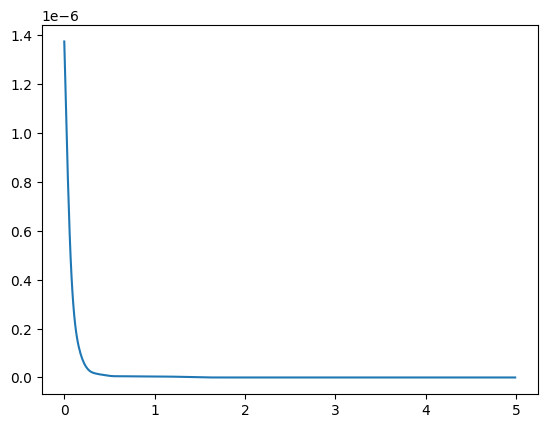

In [12]:
plt.figure()
plt.plot(time,norm_emittance_x)
plt.show()

In [13]:
norm_emittance_x

LinkedArrayCpu([1.37248949e-006, 1.22910113e-006, 1.08553400e-006,
                9.45393545e-007, 8.12795363e-007, 6.91586547e-007,
                5.84474233e-007, 4.92468507e-007, 4.15101928e-007,
                3.50885134e-007, 2.97907517e-007, 2.54319935e-007,
                2.18466381e-007, 1.88866610e-007, 1.64224779e-007,
                1.43484751e-007, 1.25801295e-007, 1.10549768e-007,
                9.72267507e-008, 8.54499029e-008, 7.49850955e-008,
                6.57025313e-008, 5.75318185e-008, 5.04090252e-008,
                4.42593441e-008, 3.89648105e-008, 3.44074064e-008,
                3.05017873e-008, 2.71953943e-008, 2.44543014e-008,
                2.22426443e-008, 2.04884551e-008, 1.90780528e-008,
                1.78966134e-008, 1.68646399e-008, 1.59361883e-008,
                1.50905080e-008, 1.43162330e-008, 1.36055504e-008,
                1.29492844e-008, 1.23329689e-008, 1.17468475e-008,
                1.11852510e-008, 1.06362277e-008, 1.00907015e-